In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1p1BWofDJOKXqCtO0JPT5VyuIPOsuxOuj/view

Downloading...
From: https://drive.google.com/uc?id=1p1BWofDJOKXqCtO0JPT5VyuIPOsuxOuj
To: /content/openlogo.tar
100% 4.71G/4.71G [00:51<00:00, 92.0MB/s]


In [2]:
!tar xf openlogo.tar

In [3]:
# сделаем anno_paths для test и train

with open('/content/openlogo/ImageSets/Main/train_test/train_all.txt', 'r') as f:
    anno_paths_train = []
    for line in f.readlines():
        anno_paths_train.append('openlogo/Annotations/' + line.strip() + '.xml\n')

with open('openlogo/train_anno_paths.txt', 'w') as f:
    f.writelines(anno_paths_train)



with open('/content/openlogo/ImageSets/Main/train_test/test_all.txt', 'r') as f:
    anno_paths_test = []
    for line in f.readlines():
        anno_paths_test.append('openlogo/Annotations/' + line.strip() + '.xml\n')

with open('openlogo/test_anno_paths.txt', 'w') as f:
    f.writelines(anno_paths_test)

In [4]:
!git clone https://github.com/Travvy88/AdvertiseDetection

Cloning into 'AdvertiseDetection'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 46 (delta 10), reused 43 (delta 7), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [5]:
from AdvertiseDetection.utils.data import add_path_to_xml, change_to_one_class

with open('openlogo/train_anno_paths.txt', 'r') as f:
    for p in f.read().split('\n')[:-1]:
        change_to_one_class(p)

with open('openlogo/test_anno_paths.txt', 'r') as f:
    for p in f.read().split('\n')[:-1]:
        change_to_one_class(p)

In [6]:
!echo "logo" > openlogo/brands.txt

In [21]:
!python /content/AdvertiseDetection/utils/voc2coco.py \
    --ann_paths_list /content/openlogo/train_anno_paths.txt \
    --labels openlogo/brands.txt \
    --output openlogo/train_coco.json \
    --ext xml

!python /content/AdvertiseDetection/utils/voc2coco.py \
    --ann_paths_list /content/openlogo/test_anno_paths.txt \
    --labels openlogo/brands.txt \
    --output openlogo/test_coco.json \
    --ext xml

{'logo': 1}
Start converting !
  0% 0/18753 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/content/AdvertiseDetection/utils/voc2coco.py", line 164, in <module>
    main()
  File "/content/AdvertiseDetection/utils/voc2coco.py", line 159, in main
    extract_num_from_imgid=args.extract_num_from_imgid
  File "/content/AdvertiseDetection/utils/voc2coco.py", line 106, in convert_xmls_to_cocojson
    ann_tree = ET.parse(a_path)
  File "/usr/lib/python3.7/xml/etree/ElementTree.py", line 1197, in parse
    tree.parse(source, parser)
  File "/usr/lib/python3.7/xml/etree/ElementTree.py", line 587, in parse
    source = open(source, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'openlogo/Annotations/3m10.xml'
Traceback (most recent call last):
  File "/content/AdvertiseDetection/utils/voc2coco.py", line 164, in <module>
    main()
  File "/content/AdvertiseDetection/utils/voc2coco.py", line 147, in main
    label2id = get_label2id(labels_path=args.labels)
  File "/co

In [8]:
!mv openlogo openlogo_coco

In [12]:
import json 

with open('openlogo_coco/test_coco.json') as json_file:
    data = json.load(json_file)

In [17]:
sorted(data['annotations'], key=lambda d: d['image_id']) 

[{'area': 1470,
  'bbox': [212, 219, 35, 42],
  'category_id': 1,
  'id': 1,
  'ignore': 0,
  'image_id': 0,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 5220,
  'bbox': [256, 135, 87, 60],
  'category_id': 1,
  'id': 2,
  'ignore': 0,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 208690,
  'bbox': [514, 44, 410, 509],
  'category_id': 1,
  'id': 3,
  'ignore': 0,
  'image_id': 2,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 81840,
  'bbox': [69, 123, 341, 240],
  'category_id': 1,
  'id': 4,
  'ignore': 0,
  'image_id': 3,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 1406,
  'bbox': [544, 270, 37, 38],
  'category_id': 1,
  'id': 5,
  'ignore': 0,
  'image_id': 4,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 1599,
  'bbox': [600, 265, 41, 39],
  'category_id': 1,
  'id': 6,
  'ignore': 0,
  'image_id': 4,
  'iscrowd': 0,
  'segmentation': []},
 {'area': 11550,
  'bbox': [29, 174, 110, 105],
  'category_id': 1,
  'id': 7,
  'ignore': 0,
  'image_id':

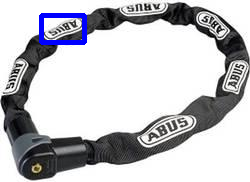

In [19]:
## проверим, что все ок 

anno = data['annotations'][17]
bbox = anno['bbox']

image = data['images'][anno['image_id']]
file_name = image['file_name']


import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('openlogo_coco/JPEGImages/' + file_name)

pt1 = (bbox[0], bbox[1])
pt2 = (bbox[0] + bbox[2], bbox[1] + bbox[3])

img = cv2.rectangle(img, pt1, pt2, (255, 0, 0), 3)
# img = cv2.resize(img, (640, 640))
cv2_imshow(img)

In [9]:
!zip -r openlogo_coco.zip openlogo_coco

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: openlogo_coco/JPEGImages/bellataylorimg000055.jpg (deflated 2%)
  adding: openlogo_coco/JPEGImages/logos32plus_007590.jpg (deflated 3%)
  adding: openlogo_coco/JPEGImages/logos32plus_004207.jpg (deflated 0%)
  adding: openlogo_coco/JPEGImages/volkswagenimg000517.jpg (deflated 2%)
  adding: openlogo_coco/JPEGImages/Pampersimg000144.jpg (deflated 1%)
  adding: openlogo_coco/JPEGImages/louisvuittonimg000011.jpg (deflated 10%)
  adding: openlogo_coco/JPEGImages/FedEximg000382.jpg (deflated 1%)
  adding: openlogo_coco/JPEGImages/logos32plus_006560.jpg (deflated 1%)
  adding: openlogo_coco/JPEGImages/coach3.jpg (deflated 4%)
  adding: openlogo_coco/JPEGImages/logos32plus_001074.jpg (deflated 4%)
  adding: openlogo_coco/JPEGImages/chanelimg000238.jpg (deflated 0%)
  adding: openlogo_coco/JPEGImages/logos32plus_000361.jpg (deflated 1%)
  adding: openlogo_coco/JPEGImages/logos32plus_003487.jpg (deflated 1%)
  adding: 

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
!cp openlogo_coco.zip /content/drive/MyDrive/Ad\ Detection/data